# Rental Location EDA

### 0) Data load & preprocess
### 1) Data overview
### 2) Variables relations 
### 3) Clustering 
### 4) Oberservation

In [87]:
# load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
import folium
from folium import plugins
from mpl_toolkits.basemap import Basemap



# set plot style
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

Populating the interactive namespace from numpy and matplotlib


In [120]:
df=pd.read_csv('DemoLondonRentals.csv')
df.columns=['id','borrower_lat','borrower_lng','lender_lat','lender_lng']

In [67]:
# help func

# -----------------------
# feature engineering 

def get_haversine_distance(lat1, lng1, lat2, lng2):
    # km
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  #  km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h


def get_manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = get_haversine_distance(lat1, lng1, lat1, lng2)
    b = get_haversine_distance(lat1, lng1, lat2, lng1)
    return a + b




def plot_heatmap_lon_lat(df,lat,lon,map_center):
    #map_center = [50.87650,4.39723]
    print (map_center)
    heatmap = folium.Map(location=map_center, 
                         tiles='https://api.tiles.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiZ29nb3ZhbmFwcCIsImEiOiJjaWg3MTk0ZjAwZmI5dXVraTF5aDNudTd0In0.mcuRTlI-EWoMm0IponVnVA',
                         attr='Map data &copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors, <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, Imagery © <a href="http://mapbox.com">Mapbox</a>',
                         zoom_start=11)

    # plz modify lon / lat columns here in cases for various dataset 
    heatmap_locations_list = df[[lat, lon]].dropna().values.tolist()
    heatmap.add_children(plugins.HeatMap(heatmap_locations_list, radius=20, blur=30))
    display(heatmap)

    
def get_country_lon_lat(lon,lat):
    pass
    
# -----------------------


In [121]:

df.loc[:, 'distance_manhattan'] = get_manhattan_distance(
                                  df['borrower_lat'].values,
                                  df['borrower_lng'].values,
                                  df['lender_lat'].values,
                                  df['lender_lng'].values)

df.loc[:, 'distance_haversine'] = get_haversine_distance(
                                  df['borrower_lat'].values,
                                  df['borrower_lng'].values,
                                  df['lender_lat'].values,
                                  df['lender_lng'].values)


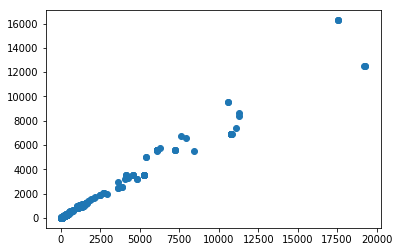

In [43]:
# manhattan VS haversine distance
plt.scatter(df.distance_manhattan, df.distance_haversine)

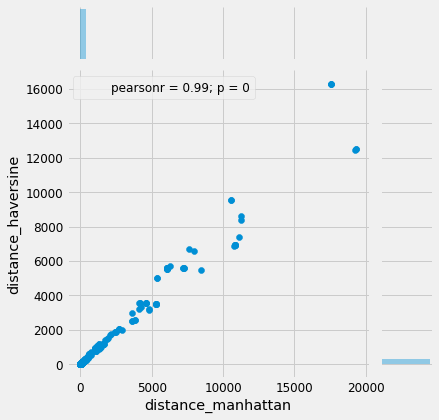

In [73]:

sns.jointplot(x="distance_manhattan", y="distance_haversine",
                
                data=df)



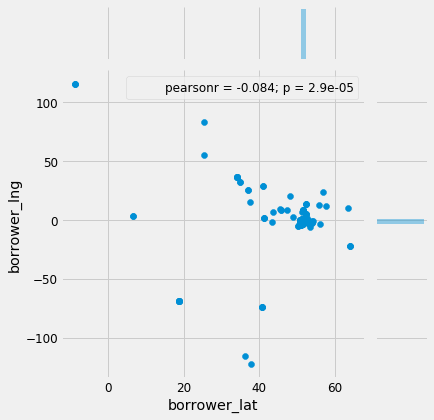

In [74]:

sns.jointplot(x="borrower_lat", y="borrower_lng",
              data=df)



In [58]:
df.head(3)

,id,borrower_lat,borrower_lng,lender_lat,lender_lng,distance_manhattan,distance_haversine
0,1,51.370,-0.0250,51.524,-0.3180,37.463402,26.561818
1,2,51.397,-0.1160,51.421,-0.1770,6.900663,5.002213
2,3,51.515,0.0193,51.493,0.0602,5.276474,3.741409


In [65]:
# borrower heatmap 
plot_heatmap_lon_lat(df,'borrower_lat','borrower_lng',[51.370,-0.025])

[51.37, -0.025]


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [66]:
# lender heatmap 
plot_heatmap_lon_lat(df,'lender_lat','lender_lng',[51.524,-0.3180])

[51.524, -0.318]


/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


Text(0.5,0,'distance_manhattan')

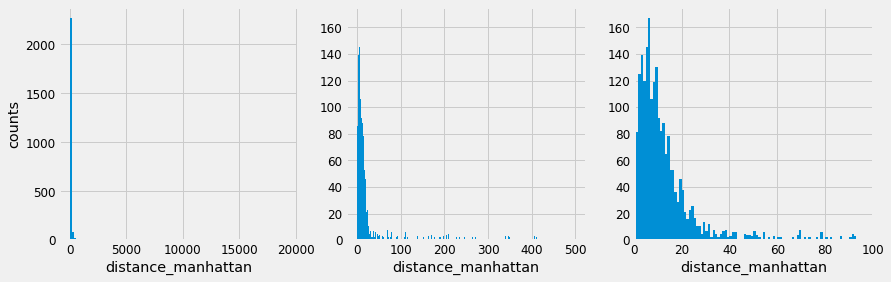

In [77]:
# distance histgram (distance_manhattan)


# make sure the ranges we chose are sensible
fig, axArray = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
# hist for all range 
axArray[0].hist(df['distance_manhattan'],100); 
axArray[0].set_xlabel('distance_manhattan')
axArray[0].set_ylabel('counts')
# hist form 0 - 500
axArray[1].hist(df['distance_manhattan'] ,bins=range(0, 500))
plt.xlim(0,500)
axArray[1].set_xlabel('distance_manhattan')
# hist from 0 - 100 
axArray[2].hist(df['distance_manhattan'],bins=range(0, 100))
plt.xlim(0,100)
axArray[2].set_xlabel('distance_manhattan')





In [113]:
#http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/



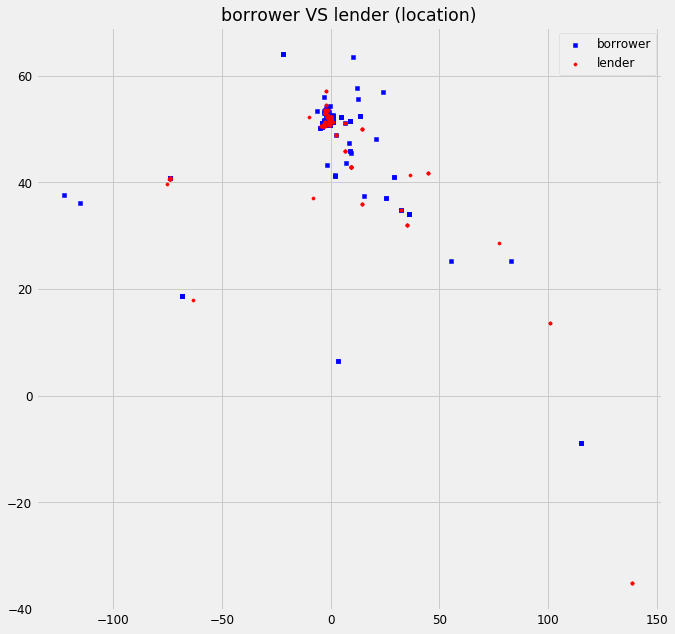

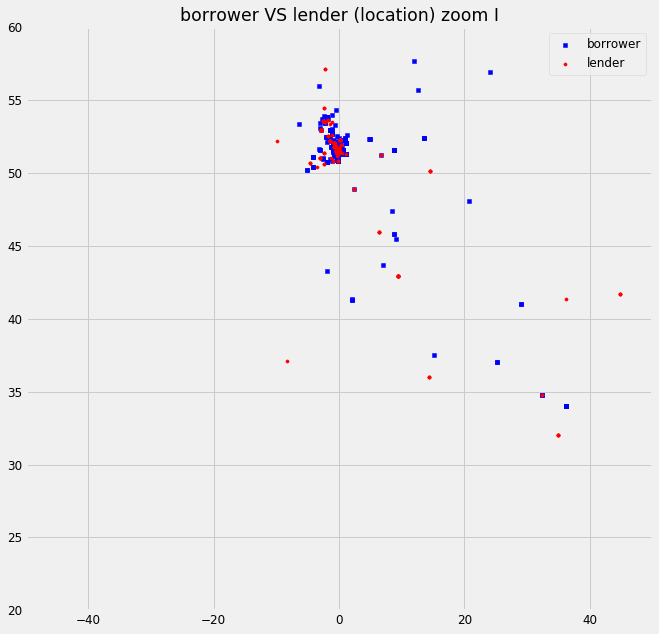

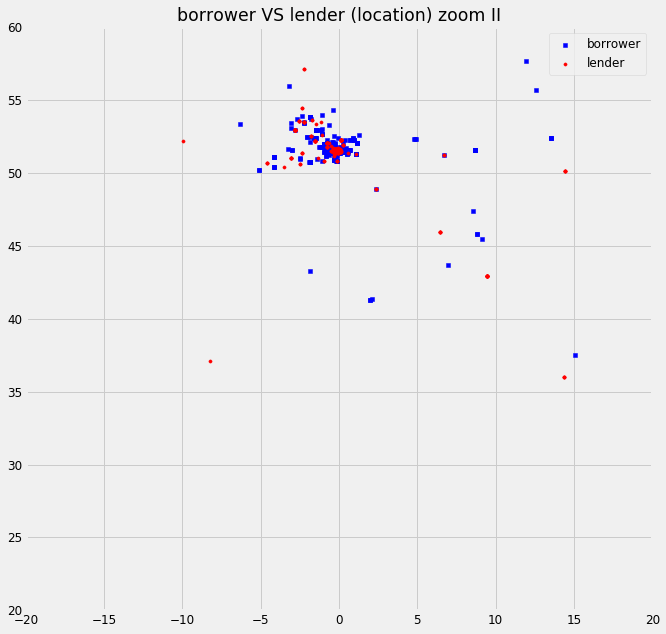

In [145]:
# visualize borrower & lender 


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.array(df.borrower_lng), np.array(df.borrower_lat), s=10, c='b', marker="s", label='first')
ax1.scatter(np.array(df.lender_lng), np.array(df.lender_lat), s=10, c='r', marker="o", label='second')
plt.legend(['borrower','lender'])
plt.title('borrower VS lender (location)')
plt.show()



fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.array(df.borrower_lng), np.array(df.borrower_lat), s=10, c='b', marker="s", label='first')
ax1.scatter(np.array(df.lender_lng), np.array(df.lender_lat), s=10, c='r', marker="o", label='second')
plt.xlim(-50,50)
plt.ylim(20,60)
plt.legend(['borrower','lender'])
plt.title('borrower VS lender (location) zoom I')
plt.show()




fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.array(df.borrower_lng), np.array(df.borrower_lat), s=10, c='b', marker="s", label='first')
ax1.scatter(np.array(df.lender_lng), np.array(df.lender_lat), s=10, c='r', marker="o", label='second')
plt.xlim(-20,20)
plt.ylim(20,60)
plt.legend(['borrower','lender'])
plt.title('borrower VS lender (location) zoom II')
plt.show()